<a href="https://colab.research.google.com/github/salisuyahaya/Car-Price-Prediction/blob/gh-pages/longevity_challenge_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PACKAGES IMPORTATION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# machine learning modules
import sklearn
print(sklearn.__version__)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score

1.0.2


In [ ]:
# LOADING DATA 

train_data = pd.read_csv('/content/Train_data.csv')\
                        

In [ ]:
train_data.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
0,59.0,12.8,3.4,1.3,2.6,51.0,0.2,0.3,50.0,0.7,0.8,78.0,1.1,2.3,3.3,0.5,0.3,0.4,0.5,1
1,31.0,10.7,3.4,1.2,3.3,35.3,0.5,2.1,25.8,0.5,0.9,55.2,0.3,1.1,1.4,0.4,0.3,0.1,0.2,0
2,48.0,9.3,4.5,1.7,3.4,49.7,0.0,0.1,0.0,1.2,1.9,61.5,0.4,0.8,1.2,0.8,0.5,0.4,1.0,0
3,80.0,27.7,11.2,3.5,9.4,37.4,1.3,4.1,32.9,2.8,3.3,85.0,0.8,1.6,2.4,3.9,1.3,0.1,2.2,1
4,58.0,18.4,5.8,1.9,5.3,36.7,0.0,0.1,25.0,1.9,3.1,61.7,0.5,0.7,1.2,1.9,1.1,0.2,1.7,0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GP       1101 non-null   float64
 1   MIN      1101 non-null   float64
 2   PTS      1101 non-null   float64
 3   FGM      1101 non-null   float64
 4   FGA      1101 non-null   float64
 5   FG%      1101 non-null   float64
 6   3P Made  1101 non-null   float64
 7   3PA      1101 non-null   float64
 8   3P%      1101 non-null   float64
 9   FTM      1101 non-null   float64
 10  FTA      1101 non-null   float64
 11  FT%      1101 non-null   float64
 12  OREB     1101 non-null   float64
 13  DREB     1101 non-null   float64
 14  REB      1101 non-null   float64
 15  AST      1101 non-null   float64
 16  STL      1101 non-null   float64
 17  BLK      1101 non-null   float64
 18  TOV      1101 non-null   float64
 19  Target   1101 non-null   int64  
dtypes: float64(19), int64(1)
memory usage: 172.2 KB


In [ ]:
train_data.isnull().sum()

GP         0
MIN        0
PTS        0
FGM        0
FGA        0
FG%        0
3P Made    0
3PA        0
3P%        0
FTM        0
FTA        0
FT%        0
OREB       0
DREB       0
REB        0
AST        0
STL        0
BLK        0
TOV        0
Target     0
dtype: int64

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GP       1101 non-null   float64
 1   MIN      1101 non-null   float64
 2   PTS      1101 non-null   float64
 3   FGM      1101 non-null   float64
 4   FGA      1101 non-null   float64
 5   FG%      1101 non-null   float64
 6   3P Made  1101 non-null   float64
 7   3PA      1101 non-null   float64
 8   3P%      1101 non-null   float64
 9   FTM      1101 non-null   float64
 10  FTA      1101 non-null   float64
 11  FT%      1101 non-null   float64
 12  OREB     1101 non-null   float64
 13  DREB     1101 non-null   float64
 14  REB      1101 non-null   float64
 15  AST      1101 non-null   float64
 16  STL      1101 non-null   float64
 17  BLK      1101 non-null   float64
 18  TOV      1101 non-null   float64
 19  Target   1101 non-null   int64  
dtypes: float64(19), int64(1)
memory usage: 172.2 KB


In [ ]:
train_data['Target'].unique()

array([1, 0])

In [ ]:
train_data['Target'].value_counts()

0    551
1    550
Name: Target, dtype: int64

In [ ]:
train_data.isna().sum()

GP         0
MIN        0
PTS        0
FGM        0
FGA        0
FG%        0
3P Made    0
3PA        0
3P%        0
FTM        0
FTA        0
FT%        0
OREB       0
DREB       0
REB        0
AST        0
STL        0
BLK        0
TOV        0
Target     0
dtype: int64

In [ ]:
train_data1 = train_data[train_data.duplicated()]

In [ ]:
train_data1.shape

(7, 20)

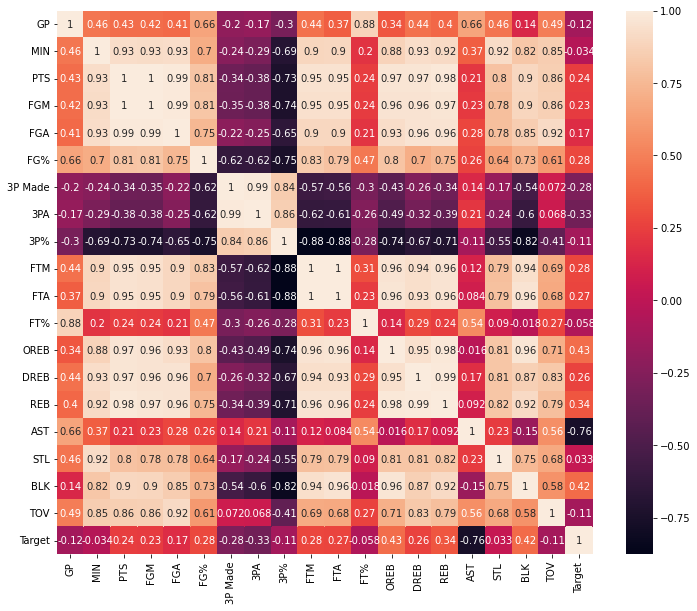

In [ ]:
#Plotting a correlation matrix
plt.figure(figsize = (12,10))
import seaborn as sns
c = train_data1.corr()
sns.heatmap(c, annot = True)

In [ ]:
#Getting the independent features
#X = train_data.iloc[:,3:-1]
#Getting the dependent feature
#y = train_data.iloc[:,-1]


In [ ]:
### TEST DATA

test_data = pd.read_csv('//content/Test_data.csv')

In [ ]:
test_data.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,44.0,13.0,6.6,2.5,5.6,45.3,0.4,1.3,32.7,1.1,1.7,65.3,0.8,0.6,1.4,1.1,0.7,0.2,1.0
1,51.0,9.1,2.7,1.0,2.7,39.0,0.1,0.3,23.5,0.6,0.8,69.8,0.3,0.7,1.0,0.9,0.6,0.1,0.7
2,51.0,15.1,5.7,2.2,5.2,41.2,0.3,0.8,32.5,1.1,1.6,69.1,0.4,1.3,1.7,2.1,0.7,0.0,1.4
3,15.0,7.9,1.9,0.7,2.5,27.0,0.0,0.0,0.0,0.5,0.8,66.7,0.5,1.1,1.5,0.5,0.1,0.1,1.0
4,36.0,14.4,5.8,2.3,5.4,43.1,0.0,0.1,50.0,1.1,1.4,82.0,1.1,1.4,2.4,0.9,0.3,0.2,0.9


In [ ]:
test_data.columns

Index(['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM',
       'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV'],
      dtype='object')

In [ ]:
test_data.isnull().sum()

GP         0
MIN        0
PTS        0
FGM        0
FGA        0
FG%        0
3P Made    0
3PA        0
3P%        0
FTM        0
FTA        0
FT%        0
OREB       0
DREB       0
REB        0
AST        0
STL        0
BLK        0
TOV        0
dtype: int64

In [ ]:
#test_data.drop(["FTA", "FTM"], axis = 1, inplace = True)

In [ ]:
#train_data.drop(["FTA", "FTM"], axis = 1, inplace = True)

In [ ]:
test_data.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,44.0,13.0,6.6,2.5,5.6,45.3,0.4,1.3,32.7,65.3,0.8,0.6,1.4,1.1,0.7,0.2,1.0
1,51.0,9.1,2.7,1.0,2.7,39.0,0.1,0.3,23.5,69.8,0.3,0.7,1.0,0.9,0.6,0.1,0.7
2,51.0,15.1,5.7,2.2,5.2,41.2,0.3,0.8,32.5,69.1,0.4,1.3,1.7,2.1,0.7,0.0,1.4
3,15.0,7.9,1.9,0.7,2.5,27.0,0.0,0.0,0.0,66.7,0.5,1.1,1.5,0.5,0.1,0.1,1.0
4,36.0,14.4,5.8,2.3,5.4,43.1,0.0,0.1,50.0,82.0,1.1,1.4,2.4,0.9,0.3,0.2,0.9


In [ ]:
print(train_data.shape)
print(test_data.shape)

(1101, 18)
(555, 17)


In [ ]:
X= train_data.drop('Target',axis =1)
y= train_data['Target']

In [ ]:
### CHECKING DIMENSIONS
print(X.shape)
print(y.shape)

(1101, 17)
(1101,)


In [ ]:
#### SPLITTING DATA INTO TRAIN AND TEST SETS
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.33, random_state=42)

In [ ]:
C = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]
#C = [0.1, 0.01, 0.001]

scores = []

for choice in C:
  logmodel.set_params(C=choice)
  logmodel.fit(X_train,y_train)
  threshlod = 0.5
  scores.append(logmodel.score(X_train,y_train))


In [ ]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter = 10000, test_size=0.3, random_state=42)

logmodel.fit(X_train,y_train)


In [ ]:
# Check the regression parameters, training and test precision
# Training nad test set model accuracy
print ('Accuracy from sk-learn on Training data: {0:.2f}%'.format(logmodel.score(X_train, y_train)*100))
print ('Accuracy from sk-learn on Test data: {0:.2f}%'.format(logmodel.score(X_test, y_test)*100))

Accuracy from sk-learn on Training data: 71.51%
Accuracy from sk-learn on Test data: 68.68%


In [ ]:
from xgboost import XGBClassifier

xg = XGBClassifier(learning_rate= 0.01, max_depth=5, min_child_weight=1, gamma= 0.1, colsample_bytree=0.8, scale_pos_weight = 1, objective="reg:nonlinear")

xg.fit(X_train,y_train)

#np.unique(xg, return_counts=False)


XGBoostError: ignored

In [ ]:
xg.fit(X_train,y_train)

np.unique(logmodel, return_counts=False)

[10:36:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([LogisticRegression(C=2, max_iter=10000)], dtype=object)

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(logmodel,X,y,cv=10)

In [ ]:
print(score)

[0.72972973 0.66363636 0.69090909 0.66363636 0.70909091 0.70909091
 0.7        0.74545455 0.75454545 0.62727273]


In [ ]:
score.mean()

0.6993366093366092

In [ ]:
predictions = logmodel.predict(test_data) 


In [ ]:
# Check the regression parameters, training and test precision
# Training nad test set model accuracy
print ('Accuracy from sk-learn on Training data: {0:.2f}%'.format(logmodel.score(X_train, y_train)*100))
print ('Accuracy from sk-learn on Test data: {0:.2f}%'.format(logmodel.score(X_test, y_test)*100))

Accuracy from sk-learn on Training data: 71.27%
Accuracy from sk-learn on Test data: 67.75%


In [ ]:
sample_sub = pd.read_csv('/content/Sample_Submission (3).csv')

In [ ]:
sub_file = sample_sub.copy()
sub_file.Offset_fault = predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [ ]:
# Create file
sub_file.to_csv('xga.csv', index = False)

In [ ]:
#Obtain class predictions
y_pred_RF_prob = RF_model_cat.predict_proba(X_test)
print('Predicted probabilities: \n', y_pred_RF_prob)

#Obtain probability predictions
y_pred_RF_class = RF_model_cat.predict(X_test)
print('Predicted classes: \n', y_pred_RF_class)

print('RF Score: ', metrics.accuracy_score(y_test, y_pred_RF_class))

## CONFUSION MATRIX
RF_cm=metrics.confusion_matrix(y_test,y_pred_RF_class)
print(RF_cm)
